<a href="https://colab.research.google.com/github/annatsv/deepcolor/blob/main/DeepColor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DeepColor 🌈 🤖

Anna Tsvetkov, Samuel Walhout, and Taojie Wang



---
## Sections & Tasks (from Devpost):  Due by Thurs April 25:
* tentative and open to change

**Section 1**: Downloading Subsets of Datasets (COCO, Places2, ADE20K)


*   Coco Dataset - Anna (Done)
*   Places2 Dataset - Samuel (Done)
*   ADE20K Dataset - Anna (Done)


**Section 2**: Preprocessing

*   Preprocessing Coco Dataset - Anna (Done)
*   Preprocessing Places2 or 365 Dataset - Samuel (Done)
*   Preprocessing ADE20K Dataset - Anna (Done)


**Section 3**: Models

*   UNet - Samuel (in progress)
*   DenseNet - Taojie (in progress)
*   MobileNet - Anna (in progress)

========================================

**Section 4**: Data Analysis and Visualizations

*   Ablation Experiments -
*   User Study - Anna (in progress: looking into MTurk, free alternatives)
*   MSE - Taojie
*   PSNR - Taojie

## Section 1: Downloading Dataset Subsets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### COCO (Common Objects in Context)

In [2]:
!pip install fiftyone
import fiftyone as fo
import fiftyone.zoo as foz

# we can define the classes we are interested in to get subset
classes = ["person", "car", "dog", "cat", "bird", "chair"] #Note: add more categories
dataset_dir = '/content/drive/My Drive/coco_subset'


# loads/downloads the dataset
dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=["detections"],
    classes=classes,
    max_samples=10,  # Note: change subset size as needed: starting off with 10 here as a test sample
    dataset_dir=dataset_dir,
    download_if_missing=True
)

print(dataset)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.1/670.1 kB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 9.1 MB/s eta 0:00:00
  Installing build dependenci

INFO:fiftyone.migrations.runner:Migrating database to v0.23.8


INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/content/drive/My Drive/coco_subset/train' if necessary


Found annotations at '/content/drive/My Drive/coco_subset/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/content/drive/My Drive/coco_subset/raw/instances_train2017.json'


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'train' is sufficient


Ignoring unsupported parameter 'download_if_missing' for importer type <class 'fiftyone.utils.coco.COCODetectionDatasetImporter'>


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |███████████████████| 10/10 [148.6ms elapsed, 0s remaining, 67.3 samples/s]     


INFO:eta.core.utils: 100% |███████████████████| 10/10 [148.6ms elapsed, 0s remaining, 67.3 samples/s]     


Dataset 'coco-2017-train-10' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-train-10' created


Name:        coco-2017-train-10
Media type:  image
Num samples: 10
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


### Places365
---
Might consider changing from Places2 dataset because Places365_small is available in TensorFlow Datasets. But need to find a way to get subset of this?

In [3]:

import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image
import os

#create filepath
places365_dir = '/content/drive/My Drive/Places365_subset'
#make directory
os.makedirs(places365_dir, exist_ok=True)

# make a tf.data.Dataset
#'test' has 328,500 images | 'train' has 1,803,460 images | 'validation' has 36,500 images
# just loading validation to make it faster but could change later
ds = tfds.load('places365_small', split='validation', shuffle_files=True)

# can change the number in 'dataset.take(x)' to whatever value we want
ds = ds.take(1000)

for index, features in enumerate(ds):

    # get uint8 and convert to PIL image (can change if needed)
    image = Image.fromarray(features['image'].numpy())
    # save the image
    image.save(os.path.join(places365_dir, f'image_{index}.jpeg'))

print(f'Images saved to {places365_dir}')


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1803460 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/places365_small/2.1.0.incompleteHKO0QF/places365_small-train.tfrecord*...:…

Generating test examples...:   0%|          | 0/328500 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/places365_small/2.1.0.incompleteHKO0QF/places365_small-test.tfrecord*...: …

Generating validation examples...:   0%|          | 0/36500 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/places365_small/2.1.0.incompleteHKO0QF/places365_small-validation.tfrecord…

Dataset places365_small downloaded and prepared to /root/tensorflow_datasets/places365_small/2.1.0. Subsequent calls will reuse this data.
Images saved to /content/drive/My Drive/Places365_subset


### ADE20k

In [4]:
# Note: ade20k_subset is the smallest subset of ADE20k available in huggingface everything else is far too large

!pip install datasets

from datasets import load_dataset
import os

dataset = load_dataset("nateraw/ade20k-tiny")

dataset_dir = '/content/drive/My Drive/ade20k_subset'

if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

for i, example in enumerate(dataset['train']):
    image = example['image']

    image.save(os.path.join(dataset_dir, f'image_{i}.jpeg'))

    if i >= 9:  # save only the first 10 images
        break

print(f'Images saved to {dataset_dir}')




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/10 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10 [00:00<?, ? examples/s]

Images saved to /content/drive/My Drive/ade20k_subset


## Section 2: Preprocessing

### Coco Preprocessing

In [5]:
import torchvision.transforms as transforms
from PIL import Image
import os
import torch
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader

transform_pipeline = transforms.Compose([
    transforms.Resize((256, 256)),  # resizes to 256x256 pixels
    transforms.Grayscale(num_output_channels=1),  # converts to grayscale
    transforms.ToTensor(),  # converts to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # normalizes pixel values
])

# data augmentation transformations (rotate, flip, etc.)
data_augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
])


In [6]:
from torchvision import transforms
from PIL import Image
import os
from torch.utils.data import Dataset, DataLoader

class CustomCocoDataset(Dataset):
    def __init__(self, dataset_dir, transform=None, apply_transform=False):
        self.dataset_dir = dataset_dir
        self.transform = transform
        self.apply_transform = apply_transform
        self.image_paths = [os.path.join(self.dataset_dir, fname) for fname in os.listdir(self.dataset_dir) if fname.endswith('.jpg')]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')

        if self.apply_transform and self.transform:
            image = self.transform(image)
        else:
            resize_transform = transforms.Compose([
                transforms.Resize((256, 256)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
            ])
            image = resize_transform(image)

        return image


transform_pipeline = transforms.Compose([
    transforms.Resize((256, 256)),  # resizes to 256x256 pixels
    transforms.Grayscale(num_output_channels=1),  # converts to grayscale
    transforms.ToTensor(),  # converts to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # normalizes pixel values
])

raw_data_loader = DataLoader(CustomCocoDataset(dataset_dir='/content/drive/My Drive/coco_subset/train/data', apply_transform=False), batch_size=5, shuffle=False)
processed_data_loader = DataLoader(CustomCocoDataset(dataset_dir='/content/drive/My Drive/coco_subset/train/data', transform=transform_pipeline, apply_transform=True), batch_size=5, shuffle=False)


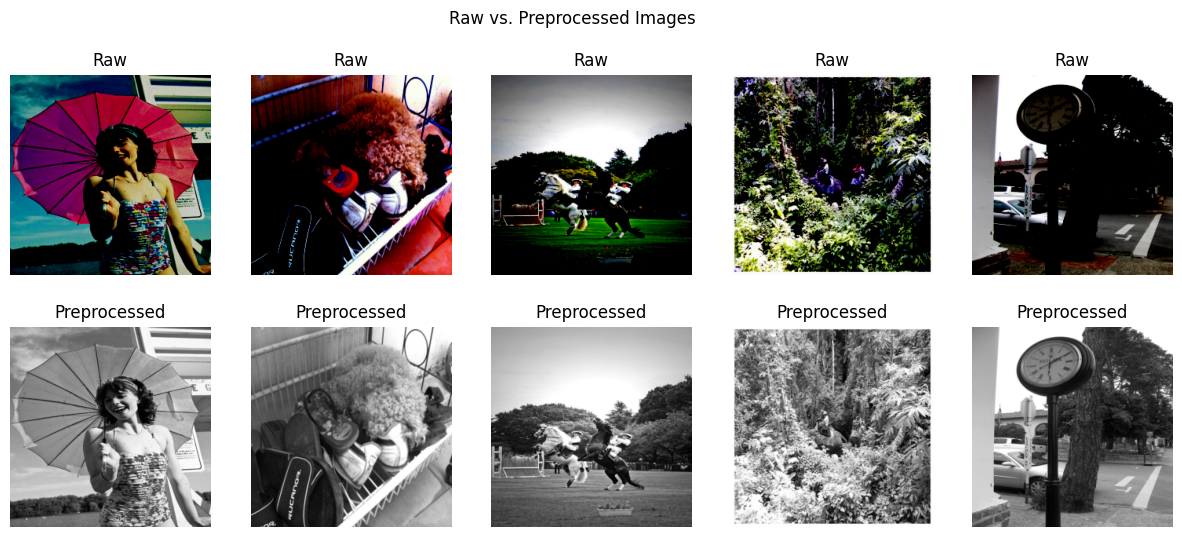

In [7]:
import matplotlib.pyplot as plt

def show_images_side_by_side(raw_images, processed_images, title="Comparison", nmax=5):
    if len(raw_images) != len(processed_images):
        raise ValueError("The number of raw and preprocessed images must be the same for side-by-side comparison.")

    fig, axes = plt.subplots(2, min(nmax, len(raw_images)), figsize=(15, 6))
    fig.suptitle(title)

    for i in range(min(nmax, len(raw_images))):
        # raw images (colored which we will use as "ground truth" for later analysis)
        ax = axes[0, i]
        image = raw_images[i].permute(1, 2, 0)
        ax.imshow(image.numpy(), cmap='gray' if image.shape[2] == 1 else None)
        ax.axis('off')
        ax.set_title("Raw")

        # processed images
        ax = axes[1, i]
        image = processed_images[i].permute(1, 2, 0)
        ax.imshow(image.numpy(), cmap='gray' if image.shape[2] == 1 else None)
        ax.axis('off')
        ax.set_title("Preprocessed")

    plt.show()

for raw_batch, processed_batch in zip(raw_data_loader, processed_data_loader):
    show_images_side_by_side(raw_batch, processed_batch, title="Raw vs. Preprocessed Images", nmax=5)
    break  # only shows the first batch



In [8]:
def save_preprocessed_images(dataset, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    for sample in dataset.iter_samples():
        image_path = sample.filepath
        image = Image.open(image_path)

        image = transforms.ToPILImage()(transforms.ToTensor()(image).squeeze())

        save_path = os.path.join(save_dir, f'preprocessed_{sample.id}.png')
        image.save(save_path)

### Places365 Preprocessing


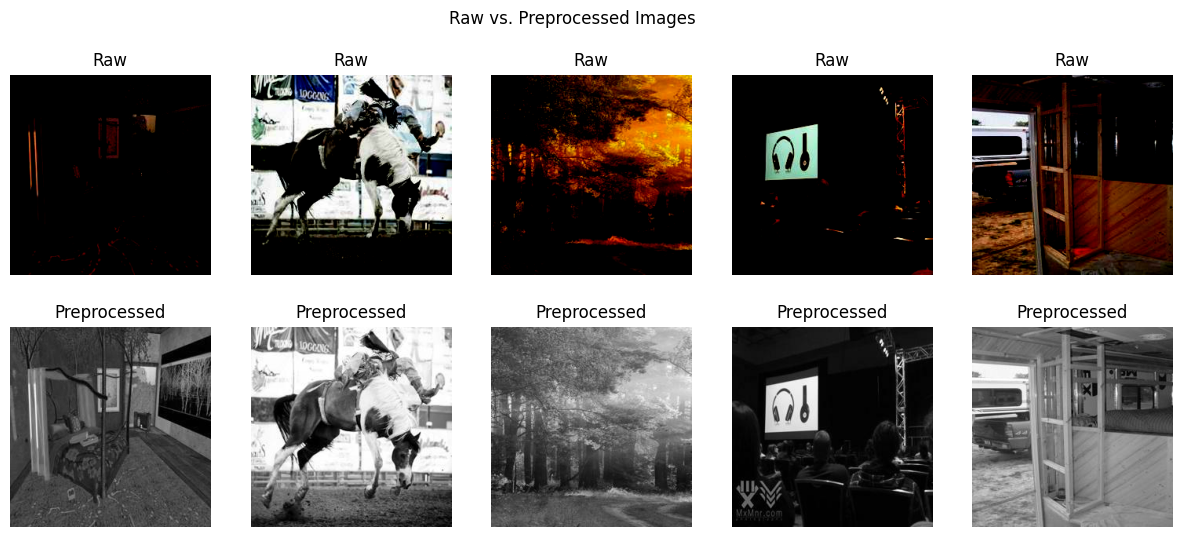

In [9]:
import os
import torch
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

class Places365Dataset(Dataset):
    def __init__(self, dataset_dir, transform=None, apply_transform=False):
        self.dataset_dir = dataset_dir
        self.transform = transform
        self.apply_transform = apply_transform
        self.image_paths = [os.path.join(self.dataset_dir, fname) for fname in os.listdir(self.dataset_dir) if fname.endswith('.jpeg')]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        img_path = self.image_paths[index]
        image = Image.open(img_path).convert('RGB')

        if self.apply_transform and self.transform:
            image = self.transform(image)
        else:
            resize_transform = transforms.Compose([
                transforms.Resize((256, 256)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
            ])
            image = resize_transform(image)

        return image

transform_pipeline = transforms.Compose([
    transforms.Resize((256, 256)),  # resizes to 256x256 pixels
    transforms.Grayscale(num_output_channels=1),  # converts to grayscale
    transforms.ToTensor(),  # converts to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # normalizes pixel values
])


dataset_dir = '/content/drive/My Drive/Places365_subset'
raw_data_loader = DataLoader(Places365Dataset(dataset_dir, apply_transform=False), batch_size=5, shuffle=False)
processed_data_loader = DataLoader(Places365Dataset(dataset_dir, transform=transform_pipeline, apply_transform=True), batch_size=5, shuffle=False)

def show_images_side_by_side(raw_images, processed_images, title="Comparison", nmax=5):
    if len(raw_images) != len(processed_images):
        raise ValueError("The number of raw and preprocessed images must be the same for side-by-side comparison.")

    fig, axes = plt.subplots(2, min(nmax, len(raw_images)), figsize=(15, 6))
    fig.suptitle(title)

    for i in range(min(nmax, len(raw_images))):
        # raw images (colored which we will use as "ground truth" for later analysis)
        ax = axes[0, i]
        image = raw_images[i].permute(1, 2, 0)
        ax.imshow(image.numpy(), cmap='gray' if image.shape[2] == 1 else None)
        ax.axis('off')
        ax.set_title("Raw")

        # processed images
        ax = axes[1, i]
        image = processed_images[i].permute(1, 2, 0)
        ax.imshow(image.numpy(), cmap='gray' if image.shape[2] == 1 else None)
        ax.axis('off')
        ax.set_title("Preprocessed")

    plt.show()

for raw_batch, processed_batch in zip(raw_data_loader, processed_data_loader):
    show_images_side_by_side(raw_batch, processed_batch, title="Raw vs. Preprocessed Images", nmax=5)
    break  # only shows the first batch


### ADE20K Preprocessing

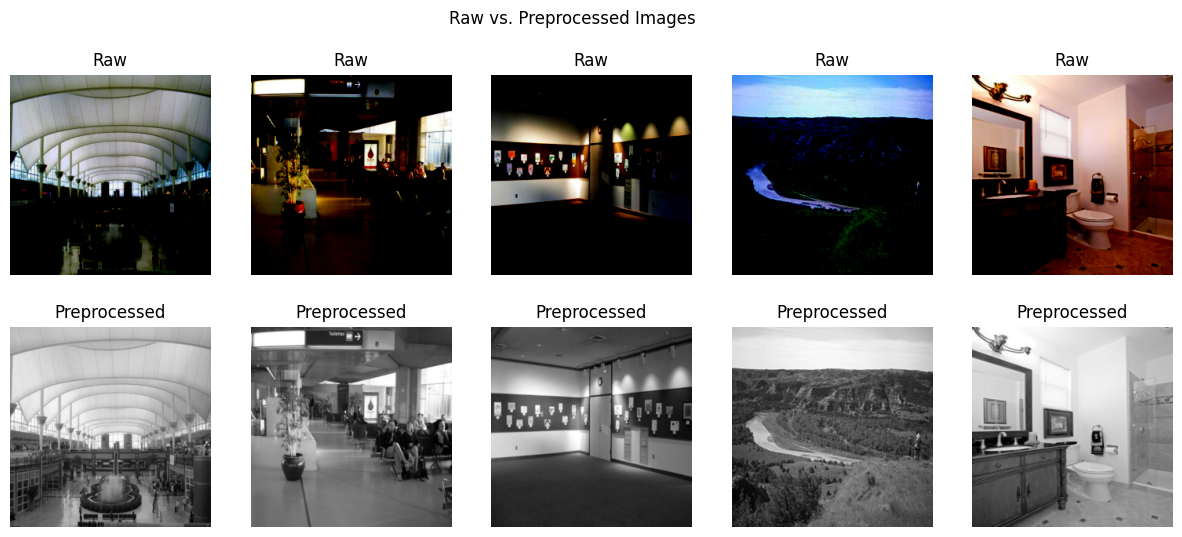

In [10]:
import os
import torch
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

class ADE20KDataset(Dataset):
    def __init__(self, dataset_dir, transform=None, apply_transform=False):
        self.dataset_dir = dataset_dir
        self.transform = transform
        self.apply_transform = apply_transform
        self.image_paths = [os.path.join(self.dataset_dir, fname) for fname in os.listdir(self.dataset_dir) if fname.endswith('.jpeg')]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')

        if self.apply_transform and self.transform:
            image = self.transform(image)
        else:
            resize_transform = transforms.Compose([
                transforms.Resize((256, 256)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
            ])
            image = resize_transform(image)

        return image

transform_pipeline = transforms.Compose([
    transforms.Resize((256, 256)),  # resizes to 256x256 pixels
    transforms.Grayscale(num_output_channels=1),  # converts to grayscale
    transforms.ToTensor(),  # converts to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # normalizes pixel values
])


dataset_dir = '/content/drive/My Drive/ade20k_subset'
raw_data_loader = DataLoader(ADE20KDataset(dataset_dir, apply_transform=False), batch_size=5, shuffle=False)
processed_data_loader = DataLoader(ADE20KDataset(dataset_dir, transform=transform_pipeline, apply_transform=True), batch_size=5, shuffle=False)

def show_images_side_by_side(raw_images, processed_images, title="Comparison", nmax=5):
    if len(raw_images) != len(processed_images):
        raise ValueError("The number of raw and preprocessed images must be the same for side-by-side comparison.")

    fig, axes = plt.subplots(2, min(nmax, len(raw_images)), figsize=(15, 6))
    fig.suptitle(title)

    for i in range(min(nmax, len(raw_images))):
        # raw images (colored which we will use as "ground truth" for later analysis)
        ax = axes[0, i]
        image = raw_images[i].permute(1, 2, 0)
        ax.imshow(image.numpy(), cmap='gray' if image.shape[2] == 1 else None)
        ax.axis('off')
        ax.set_title("Raw")

        # processed images
        ax = axes[1, i]
        image = processed_images[i].permute(1, 2, 0)
        ax.imshow(image.numpy(), cmap='gray' if image.shape[2] == 1 else None)
        ax.axis('off')
        ax.set_title("Preprocessed")

    plt.show()

for raw_batch, processed_batch in zip(raw_data_loader, processed_data_loader):
    show_images_side_by_side(raw_batch, processed_batch, title="Raw vs. Preprocessed Images", nmax=5)
    break  # only shows the first batch


In [11]:
preprocessed_save_dir = '/content/drive/My Drive/ade20k_preprocessed'

if not os.path.exists(preprocessed_save_dir):
    os.makedirs(preprocessed_save_dir)

def save_preprocessed_images(data_loader, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for batch_index, image_tensors in enumerate(data_loader):
        for i, image_tensor in enumerate(image_tensors):
            pil_image = transforms.ToPILImage()(image_tensor)

            save_path = os.path.join(save_dir, f'preprocessed_{batch_index * data_loader.batch_size + i}.png')

            pil_image.save(save_path)

save_preprocessed_images(processed_data_loader, preprocessed_save_dir)



### Section 3: Models

U-Net

Took inspiration from https://www.tensorflow.org/tutorials/images/segmentation

In [12]:
import tensorflow as tf

class EncoderBlock(tf.keras.layers.Layer):

  def __init__(self, filters, kernel_size, strides):
      super(EncoderBlock, self).__init__()
      self.conv_layer = tf.keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')
      self.batch_norm_layer = tf.keras.layers.BatchNormalization()
      self.leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.1)

  def call(self, inputs):
      x = self.conv_layer(inputs)
      x = self.batch_norm_layer(x)
      x = self.leaky_relu(x)
      return x

class DecoderBlock(tf.keras.layers.Layer):

  def __init__(self, filters, kernel_size, strides, apply_dropout=False):
      super(DecoderBlock, self).__init__()
      self.trans_conv_layer = tf.keras.layers.Conv2DTranspose(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')
      self.batch_norm_layer = tf.keras.layers.BatchNormalization()
      self.dropout_layer = tf.keras.layers.Dropout(0.5) if apply_dropout else None
      self.relu_activation = tf.keras.layers.ReLU()

  def call(self, inputs, skip_connection):
        x = self.trans_conv_layer(inputs)
        x = tf.concat([x, skip_connection], axis=-1)  # Concatenate with skip connection
        x = self.batch_norm_layer(x)
        if self.dropout_layer is not None:
            x = self.dropout_layer(x)
        x = self.relu_activation(x)
        return x

def build_unet_model(input_shape=(256, 256, 1)):

  #input layer
  inputs = tf.keras.layers.Input(shape=input_shape)

  #encoder blocks
  encoder1 = EncoderBlock(filters=64, kernel_size=(3, 3), strides=(2, 2))(inputs)
  encoder2 = EncoderBlock(filters=128, kernel_size=(3, 3), strides=(2, 2))(encoder1)
  encoder3 = EncoderBlock(filters=256, kernel_size=(3, 3), strides=(2, 2))(encoder2)
  encoder4 = EncoderBlock(filters=512, kernel_size=(3, 3), strides=(2, 2))(encoder3)

  #skip connections
  skip_connections = [encoder1, encoder2, encoder3, encoder4]

  #decoder blocks
  decoder1 = DecoderBlock(filters=256, kernel_size=(3, 3), strides=(2, 2), apply_dropout=True)(encoder4, skip_connections[-2])
  decoder2 = DecoderBlock(filters=128, kernel_size=(3, 3), strides=(2, 2), apply_dropout=True)(decoder1, skip_connections[-3])
  decoder3 = DecoderBlock(filters=64, kernel_size=(3, 3), strides=(2, 2), apply_dropout=True)(decoder2, skip_connections[-4])

  #generate RGB image with final convolutional layer
  outputs = tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=(3, 3), strides=(2, 2), padding='same')(decoder3) #output shape: (None, 256, 256, 3)

  #create model
  model = tf.keras.Model(inputs=inputs, outputs=outputs)

  return model

model = build_unet_model()
model.compile(optimizer='adam', loss='mse')
model.summary()







Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 encoder_block (EncoderBloc  (None, 128, 128, 64)         896       ['input_1[0][0]']             
 k)                                                                                               
                                                                                                  
 encoder_block_1 (EncoderBl  (None, 64, 64, 128)          74368     ['encoder_block[0][0]']       
 ock)                                                                                             
                                                                                              

Dense-Net

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, Concatenate, Activation, BatchNormalization
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.utils import plot_model

def build_densenet_colorization_model(input_shape=(256, 256, 1)):
    #Load a pre-trained DenseNet model, excluding the top fully connected layer
    base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(input_shape[0], input_shape[1], 3))

    #Since DenseNet121 expects three channels, we need to duplicate the grayscale input
    inputs = Input(shape=input_shape)
    x = Concatenate()([inputs, inputs, inputs])  # Concatenate to mimic three channels

    #Pass the inputs through the DenseNet base model
    x = base_model(x)

    #UpSampling and Convolution Layers to reconstruct the color image
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(2, (3, 3), padding='same')(x)
    x = Activation('tanh')(x)
    outputs = UpSampling2D(size=(2, 2))(x)

    # Create the full model
    model = Model(inputs=inputs, outputs=outputs)
    return model

model = build_densenet_colorization_model()
model.compile(optimizer='adam', loss='mse')
model.summary()

29084464/29084464 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 256, 256, 3)          0         ['input_3[0][0]',             
                                                                     'input_3[0][0]',             
                                                                     'input_3[0][0]']             
                                                                                                  
 densenet121 (Functional)    (None, 8, 8, 1024)           7037504   ['concatenate[0][0]']         
                           

Mobile-Net

In [14]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, UpSampling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array, load_img

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3), pooling=None) # Note: this was a theoretical decision made here from (256, 256, 3) to fit the model
base_model.trainable = False

def add_layers(x, filters, kernel_size, upsample_size=(2, 2)):
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(filters, kernel_size, activation='relu', padding='same')(x)
    return x

output = base_model.output

output = add_layers(output, 512, 3, upsample_size=(2, 2))
output = add_layers(output, 256, 3)
output = add_layers(output, 128, 3)
output = add_layers(output, 64, 3)
output = add_layers(output, 32, 3)


# checks that the final conv layer matches the input image size and channels
final_output = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(output)

model = Model(inputs=base_model.input, outputs=final_output)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# sanity check here
model.summary()


def preprocess_image(file_path):
    img = load_img(file_path, color_mode='rgb', target_size=(256, 256))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')



17225924/17225924 [==============================] - 0s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 128, 128, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 128, 128, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 128, 128, 32)      288       
 )                                                               
                                                            

In [15]:
# sanity check for contents of directorties to make sure images are there
import os

#print("Listing files in coco_dir:", os.listdir(coco_dir))
#print("Listing files in places365_dir:", os.listdir(places365_dir))
#print("Listing files in ade20k_dir:", os.listdir(ade20k_dir))

base_dir = '/content/drive/My Drive/'

coco_dir = os.path.join(base_dir, 'coco_subset')
train_dir = os.path.join(coco_dir, 'train')
raw_dir = os.path.join(coco_dir, 'raw')

# prints the contents of the directories
print("Contents of coco_dir:", os.listdir(coco_dir))
print("Contents of train_dir:", os.listdir(train_dir))
print("Contents of raw_dir:", os.listdir(raw_dir))

data_dir = os.path.join(train_dir, 'data')
print("Contents of data_dir:", os.listdir(data_dir))



Contents of coco_dir: ['train', 'raw', 'info.json']
Contents of train_dir: ['data', 'labels.json']
Contents of raw_dir: ['instances_train2017.json', 'instances_val2017.json', 'captions_train2017.json', 'captions_val2017.json', 'person_keypoints_train2017.json', 'person_keypoints_val2017.json']
Contents of data_dir: ['000000000036.jpg', '000000000042.jpg', '000000000049.jpg', '000000000061.jpg', '000000000064.jpg', '000000000074.jpg', '000000000071.jpg', '000000000077.jpg', '000000000086.jpg', '000000000094.jpg']


In [16]:
import os
import numpy as np
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet import preprocess_input

class ImageGenerator(Sequence):
    def __init__(self, directory, batch_size=10, target_size=(256, 256), shuffle=True):
        self.directory = directory
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle
        self.image_filenames = [os.path.join(directory, f) for f in os.listdir(directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        self.indexes = np.arange(len(self.image_filenames))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __len__(self):
        return int(np.ceil(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_filenames = [self.image_filenames[k] for k in indexes]
        return self.__data_generation(batch_filenames)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, batch_filenames):
        images = []
        for filename in batch_filenames:
            img = load_img(filename, target_size=self.target_size, color_mode='rgb')
            img_array = img_to_array(img)
            img_processed = preprocess_input(img_array)
            images.append(img_processed)
        images = np.array(images)
        print("Batch shape:", images.shape)  # to debug
        return images, images


base_dir = '/content/drive/My Drive/'
coco_dir = os.path.join(base_dir, 'coco_subset', 'train', 'data')
places365_dir = os.path.join(base_dir, 'Places365_subset')
ade20k_dir = os.path.join(base_dir, 'ade20k_subset')

train_generator_coco = ImageGenerator(coco_dir)
train_generator_places365 = ImageGenerator(places365_dir)
train_generator_ade20k = ImageGenerator(ade20k_dir)



In [17]:
# sanity check

print("Listing files in coco_dir:", os.listdir(coco_dir))
print("Listing files in places365_dir:", os.listdir(places365_dir))
print("Listing files in ade20k_dir:", os.listdir(ade20k_dir))


Listing files in coco_dir: ['000000000036.jpg', '000000000042.jpg', '000000000049.jpg', '000000000061.jpg', '000000000064.jpg', '000000000074.jpg', '000000000071.jpg', '000000000077.jpg', '000000000086.jpg', '000000000094.jpg']
Listing files in places365_dir: ['image_0.jpeg', 'image_1.jpeg', 'image_2.jpeg', 'image_3.jpeg', 'image_4.jpeg', 'image_5.jpeg', 'image_6.jpeg', 'image_7.jpeg', 'image_8.jpeg', 'image_9.jpeg', 'image_10.jpeg', 'image_11.jpeg', 'image_12.jpeg', 'image_13.jpeg', 'image_14.jpeg', 'image_15.jpeg', 'image_16.jpeg', 'image_17.jpeg', 'image_18.jpeg', 'image_19.jpeg', 'image_20.jpeg', 'image_21.jpeg', 'image_22.jpeg', 'image_23.jpeg', 'image_24.jpeg', 'image_25.jpeg', 'image_26.jpeg', 'image_27.jpeg', 'image_28.jpeg', 'image_29.jpeg', 'image_30.jpeg', 'image_31.jpeg', 'image_32.jpeg', 'image_33.jpeg', 'image_34.jpeg', 'image_35.jpeg', 'image_36.jpeg', 'image_37.jpeg', 'image_38.jpeg', 'image_39.jpeg', 'image_40.jpeg', 'image_41.jpeg', 'image_42.jpeg', 'image_43.jpeg', '

In [18]:
#TODO: get shape sizes aligned (256, 256, 3)

import tensorflow as tf

def train_and_save_model(generator, model, dataset_name, epochs=5):
    print(f"Starting training on {dataset_name}")
    model.fit(x=generator, epochs=epochs, steps_per_epoch=len(generator))
    model.save(f"{dataset_name}_model.h5")
    print(f"Model trained and saved for {dataset_name}")

train_generator_coco = ImageGenerator(coco_dir)
train_generator_places365 = ImageGenerator(places365_dir)
train_generator_ade20k = ImageGenerator(ade20k_dir)

train_and_save_model(train_generator_coco, model, 'coco', epochs=5)
train_and_save_model(train_generator_places365, model, 'places365', epochs=5)
train_and_save_model(train_generator_ade20k, model, 'ade20k', epochs=5)



Starting training on coco
Batch shape: (10, 256, 256, 3)
Epoch 1/5
Batch shape: (10, 256, 256, 3)
1/1 [==============================] - 16s 16s/step - loss: 0.5239
Epoch 2/5
Batch shape: (10, 256, 256, 3)
1/1 [==============================] - 12s 12s/step - loss: 0.3747
Epoch 3/5
Batch shape: (10, 256, 256, 3)
1/1 [==============================] - 12s 12s/step - loss: 0.3289
Epoch 4/5
Batch shape: (10, 256, 256, 3)
1/1 [==============================] - 12s 12s/step - loss: 0.3157
Epoch 5/5
Batch shape: (10, 256, 256, 3)
1/1 [==============================] - 11s 11s/step - loss: 0.3111


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model trained and saved for coco
Starting training on places365
Batch shape: (10, 256, 256, 3)
Epoch 1/5
Batch shape: (10, 256, 256, 3)
Batch shape: (10, 256, 256, 3)
Batch shape: (10, 256, 256, 3)
100/100 [==============================] - 1135s 11s/step - loss: 0.3222
Epoch 2/5
Batch shape: (10, 256, 256, 3)
Batch shape: (10, 256, 256, 3)
Batch shape: (10, 256, 256, 3)
100/100 [==============================] - 1143s 11s/step - loss: 0.3079
Epoch 3/5
Batch shape: (10, 256, 256, 3)
Batch shape: (10, 256, 256, 3)
Batch shape: (10, 256, 256, 3)
100/100 [==============================] - 1136s 11s/step - loss: 0.2920
Epoch 4/5
Batch shape: (10, 256, 256, 3)
Batch shape: (10, 256, 256, 3)
Batch shape: (10, 256, 256, 3)
100/100 [==============================] - 1124s 11s/step - loss: 0.2822
Epoch 5/5
Batch shape: (10, 256, 256, 3)
Batch shape: (10, 256, 256, 3)
Batch shape: (10, 256, 256, 3)
100/100 [==============================] - 1111s 11s/step - loss: 0.2761
Model trained and saved f

## Section 4: Data Analysis and Visualizations

Ablation Experiments

User Study

MSE

PSNR